# Подготовка

In [9]:
# Python
import itertools
import os
import sys
from typing import Type

# Data
import pandas as pd

# Math
import numpy as np

# Frameworks
import optuna

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# My
module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.insert(1, module_path)
from src.loaders.loaders_factory import SaveLoaderFactory, OptunaSaveLoaderFactory

In [10]:
class CFG:
    '''
    Конфигурационный класс, хранящий различные константы, флаги и прочее
    '''
    # Technical
    seed = 2024

    # Train
    test_size = 0.2

    # Frameworks
    max_iter = 10
    n_trials = 25

    # Path
    general_folder_path = "../"
    data_path = f"{general_folder_path}data/"
    results_path = f"{general_folder_path}Results/"

# Общее

In [11]:
frameworks = ["RayTune", "Optuna", "Hyperopt", "Bayesian", "Talos"]

In [12]:
loaders = {name: SaveLoaderFactory().create(f"{CFG.results_path}{name}/") for name in frameworks if name != "Optuna"}
loaders["Optuna"] = OptunaSaveLoaderFactory().create(f"{CFG.results_path}Optuna/")

# Results

In [13]:
for name in frameworks:
    print(name)
    result = loaders[name].load_results().sort_index(axis=1, level=[0])
    result["MAE"] = result["MAE"].apply(lambda value: round(value, 2))
    result["Time"] = result["Time"].apply(lambda value: round(value, 3))
    result.index += 1
    display(result)
    print(end="\n"*2)

RayTune


MAE                          Params                             \
       Test   Train      Val      criterion max_depth min_samples_leaf   
1    923.20  707.34  1064.92        poisson        10                6   
2    923.14  685.83  1061.10   friedman_mse        10                9   
3    923.20  686.89  1072.28   friedman_mse        10                5   
4    923.64  661.60  1082.95        poisson        10                7   
5    923.60  702.68  1068.30        poisson        10                6   
6    923.21  685.88  1062.32   friedman_mse        10                9   
7    923.64  661.61  1082.99        poisson        10                7   
8    923.44  656.77  1085.52        poisson        10                7   
9    923.29  693.76  1052.36   friedman_mse        10                8   
10  1042.05  673.71  1094.95  squared_error        50                8   

                            R2                          Time                \
   min_samples_split      Test     Train       Val Iteration   Test  Train   
1                 19  0.965636  0.979307  0.956890   124.645  0.018  6.762   
2                 19  0.965715  0.979889  0.956963   122.040  0.016  6.569   
3                 18  0.965680  0.979892  0.956208   128.538  0.017  6.685   
4                 15  0.965596  0.981747  0.955819   127.670  0.019  8.025   
5                 13  0.965577  0.979550  0.956717   121.502  0.016  6.650   
6                 18  0.965708  0.979968  0.956888   126.817  0.018  7.080   
7                 15  0.965596  0.981747  0.955815   118.415  0.015  7.388   
8                 18  0.965627  0.981931  0.955636   121.563  0.015  7.040   
9                 16  0.965696  0.980110  0.957887   135.975  0.032  9.339   
10                19  0.958706  0.980743  0.954970   128.500  0.032  6.712   

           
      Val  
1   0.059  
2   0.060  
3   0.063  
4   0.066  
5   0.060  
6   0.065  
7   0.065  
8   0.060  
9   0.186  
10  0.068



Optuna


MAE                          Params                             \
      Test   Train      Val      criterion max_depth min_samples_leaf   
1   923.62  666.24  1080.85        poisson        10                6   
2   923.14  667.48  1073.91   friedman_mse        10                9   
3   924.42  691.36  1072.06  squared_error        10                4   
4   922.94  674.27  1075.03        poisson        10                8   
5   923.21  661.17  1089.62   friedman_mse        10                9   
6   923.21  751.29  1040.26   friedman_mse        10                9   
7   922.87  700.57  1066.58        poisson        10               10   
8   923.12  740.72  1048.62   friedman_mse        10                8   
9   923.07  708.14  1053.52   friedman_mse        10                8   
10  924.47  745.99  1063.62        poisson        10                3   

                            R2                          Time                \
   min_samples_split      Test     Train       Val Iteration   Test  Train   
1                 13  0.965576  0.980635  0.955295    47.729  0.015  5.344   
2                 19  0.965715  0.981011  0.956341    47.302  0.015  5.555   
3                  8  0.965479  0.979761  0.956531    44.905  0.016  5.268   
4                 18  0.965728  0.980310  0.955932    46.803  0.016  5.501   
5                 18  0.965708  0.981246  0.955268    50.352  0.016  5.660   
6                 18  0.965708  0.977345  0.959024    46.367  0.016  5.312   
7                 20  0.965748  0.979319  0.957032    45.680  0.015  5.394   
8                 18  0.965718  0.976788  0.957893    41.506  0.015  4.830   
9                 20  0.965720  0.979249  0.957845    44.981  0.015  5.012   
10                14  0.965480  0.977118  0.957247    42.158  0.016  4.840   

           
      Val  
1   0.053  
2   0.055  
3   0.056  
4   0.052  
5   0.055  
6   0.050  
7   0.051  
8   0.044  
9   0.047  
10  0.046



Hyperopt


MAE                          Params                             \
      Test   Train      Val      criterion max_depth min_samples_leaf   
1   924.68  720.60  1055.61        poisson        10                4   
2   923.33  745.41  1042.42  squared_error        10                8   
3   923.00  702.16  1063.42  squared_error        10               10   
4   922.87  727.10  1042.37        poisson        10               10   
5   923.62  754.06  1043.85        poisson        10                6   
6   924.04  734.31  1059.43        poisson        10                3   
7   923.47  717.22  1049.78        poisson        10                6   
8   923.00  741.58  1046.10   friedman_mse        10               10   
9   924.17  740.14  1039.10        poisson        10                3   
10  923.14  762.21  1033.18  squared_error        10                9   

                            R2                          Time                \
   min_samples_split      Test     Train       Val Iteration   Test  Train   
1                 10  0.965441  0.978188  0.957581    96.546  0.016  3.301   
2                 16  0.965693  0.977152  0.958499    96.226  0.018  3.283   
3                 20  0.965727  0.978913  0.956991    93.599  0.016  3.308   
4                 20  0.965748  0.977304  0.958156    96.627  0.015  3.418   
5                 13  0.965576  0.976297  0.958339    94.781  0.016  3.349   
6                 19  0.965545  0.977920  0.957479    92.537  0.014  3.296   
7                 16  0.965588  0.978134  0.957763    92.238  0.015  3.272   
8                 20  0.965727  0.977427  0.958359    88.294  0.015  3.136   
9                 18  0.965530  0.977069  0.958494    88.405  0.016  3.105   
10                19  0.965715  0.976477  0.959297    90.912  0.017  3.205   

           
      Val  
1   0.035  
2   0.033  
3   0.037  
4   0.035  
5   0.035  
6   0.034  
7   0.036  
8   0.033  
9   0.034  
10  0.034



Bayesian


MAE                          Params                             \
       Test   Train      Val      criterion max_depth min_samples_leaf   
1    923.00  797.00  1006.47  squared_error        10               10   
2    923.00  817.35   995.67  squared_error        10               10   
3    922.87  803.97  1003.99        poisson        10               10   
4    922.87  784.77  1017.24        poisson        10               10   
5    922.87  777.71  1011.65        poisson        10               10   
6    923.00  746.75  1027.34   friedman_mse        10               10   
7    950.75  754.56  1036.86        poisson        15               10   
8    923.66  789.10  1014.94        poisson        10                6   
9    923.00  783.66  1004.85  squared_error        10               10   
10  1025.97  717.03  1052.04        poisson        55               10   

                            R2                          Time                \
   min_samples_split      Test     Train       Val Iteration   Test  Train   
1                 20  0.965727  0.974378  0.960637    89.645  0.016  2.949   
2                 20  0.965727  0.973097  0.961380    86.331  0.015  2.835   
3                 20  0.965748  0.974089  0.960937    88.600  0.016  2.937   
4                 20  0.965748  0.974866  0.960194    87.060  0.015  2.905   
5                 20  0.965748  0.974833  0.960026    91.866  0.014  3.027   
6                 20  0.965727  0.976275  0.958910    93.874  0.015  3.102   
7                 20  0.963871  0.977346  0.959437   105.020  0.021  3.490   
8                 12  0.965570  0.974288  0.959957    90.609  0.016  2.982   
9                 20  0.965727  0.974016  0.960505    87.122  0.016  2.858   
10                20  0.959773  0.979562  0.958334   102.170  0.028  3.456   

           
      Val  
1   0.031  
2   0.027  
3   0.029  
4   0.030  
5   0.030  
6   0.034  
7   0.033  
8   0.032  
9   0.030  
10  0.035



Talos


MAE                          Params                             \
       Test   Train      Val      criterion max_depth min_samples_leaf   
1    923.44  703.83  1056.36        poisson        10                7   
2    925.00  697.78  1067.26   friedman_mse        10                1   
3    923.29  743.15  1066.12  squared_error        10                6   
4    923.24  713.81  1062.98   friedman_mse        10                8   
5    922.87  712.65  1063.12        poisson        10               10   
6    922.78  718.80  1059.97        poisson        10                9   
7    924.15  646.32  1087.28   friedman_mse        10                3   
8    923.12  723.47  1035.27  squared_error        10                7   
9   1015.19  598.93  1099.88  squared_error        20                9   
10   924.63  732.28  1049.10        poisson        10                1   

                            R2                          Time                \
   min_samples_split      Test     Train       Val Iteration   Test  Train   
1                 18  0.965627  0.979713  0.957647    94.637  0.015  3.346   
2                  3  0.965371  0.979843  0.956501    96.347  0.014  3.416   
3                 12  0.965641  0.977316  0.957232    89.937  0.014  3.150   
4                 17  0.965701  0.979029  0.957272    95.614  0.015  3.366   
5                 20  0.965748  0.978006  0.956789    95.223  0.014  3.344   
6                 19  0.965754  0.978906  0.957474    92.860  0.014  3.267   
7                  6  0.965520  0.982137  0.955325   101.485  0.016  3.591   
8                 20  0.965706  0.979188  0.959140    98.882  0.014  3.506   
9                 19  0.960048  0.984345  0.954411   107.007  0.026  3.804   
10                16  0.965420  0.978029  0.957932    89.485  0.015  3.136   

           
      Val  
1   0.033  
2   0.033  
3   0.032  
4   0.034  
5   0.034  
6   0.033  
7   0.038  
8   0.031  
9   0.039  
10  0.031

# Times

In [14]:
all_results_time = {}
for name in frameworks:
    results = loaders[name].load_results()
    all_results_time[name] = {"Iteration": results["Time", "Iteration"].mean(),
                              "Train": results["Time", "Train"].mean(),
                              "Val": results["Time", "Val"].mean(),
                              "Test": results["Time", "Test"].mean()}

In [15]:
time_results = pd.DataFrame(all_results_time).transpose()
time_results

,Iteration,Train,Val,Test
RayTune,125.566561,7.225030,0.075215,0.019800
Optuna,45.778344,5.271611,0.050946,0.015500
Hyperopt,93.016575,3.267260,0.034581,0.015801
Bayesian,92.229837,3.054162,0.031144,0.017201
Talos,96.147813,3.392662,0.033781,0.015699


# Best results

In [16]:
best_params = {}
for name in frameworks:
    results = loaders[name].load_results()
    sorted = results["R2"].sort_values("Test", ascending=False)
    idx = sorted.iloc[0].name
    best_result = results.loc[idx]["Params"].to_dict()
    best_result["R2 score"] = results.loc[idx]["R2", "Test"]
    best_result["MAE score"] = results.loc[idx]["MAE", "Test"]
    best_params[name] = best_result

In [17]:
best_results = pd.DataFrame(best_params).transpose()
best_results

,criterion,max_depth,min_samples_leaf,min_samples_split,R2 score,MAE score
RayTune,friedman_mse,10,9,19,0.965715,923.139323
Optuna,poisson,10,10,20,0.965748,922.87394
Hyperopt,poisson,10,10,20,0.965748,922.87394
Bayesian,poisson,10,10,20,0.965748,922.87394
Talos,poisson,10,9,19,0.965754,922.776121


# Avg Score

In [87]:
avg_score = {}
for name in frameworks:
    results = loaders[name].load_results()
    avg_score[name] = {
        "R2": results["R2", "Test"].mean(),
        "MAE": results["MAE", "Test"].mean()
    }

In [88]:
avg_score = pd.DataFrame(avg_score).transpose()
avg_score

,R2,MAE
RayTune,0.964954,935.240743
Optuna,0.965658,923.405127
Hyperopt,0.965629,923.531324
Bayesian,0.964937,936.098042
Talos,0.965054,932.771577


# Duplicates

In [20]:
duplicates_best = {}
for name in frameworks:
    results = loaders[name].load_results()
    duplicates_best[name] = {"Params": sum(results["Params"].duplicated()),
                        "Score": sum(results["R2", "Test"].duplicated())}

duplicates_best = pd.DataFrame(duplicates_best).transpose()
duplicates_best

,Params,Score
RayTune,1,1
Optuna,1,1
Hyperopt,0,1
Bayesian,4,5
Talos,0,0


In [42]:
duplicates = {}
for name in frameworks:
    loader = loaders[name]
    duplicates[name] = []
    for idx in range(loader.iter_count):
        params_list = loader.load_results()["Params"].columns
        duplicates[name].append(sum(loader.load_trials(idx)[params_list].duplicated()))
        

duplicates = pd.DataFrame(duplicates).transpose()
duplicates


,0,1,2,3,4,5,6,7,8,9
RayTune,0,0,0,0,0,0,0,0,0,1
Optuna,0,0,0,0,0,0,0,1,0,0
Hyperopt,2,0,0,0,1,0,1,0,0,1
Bayesian,1,1,0,0,0,0,5,2,0,1
Talos,0,0,0,0,0,0,0,0,0,0


# History

## Визуализация

In [68]:
def find_best(values):
  y = [values[0]]
  for value in values.values[1:]:
    if value > y[-1]:
      y.append(value)
    else:
      y.append(y[-1])
  return y

In [67]:
def show(history, best):
    plt.figure(figsize=(18, 5))
    ax = sns.scatterplot(history["Value"])
    ax = sns.lineplot(x=history.index, y=best, color="r")
    plt.legend(["Objective value", "Best value"], bbox_to_anchor=(1, 1), frameon=False)
    plt.title(f"{name} History Plot")
    ax.set_xlabel("Trial")
    ax.set_ylabel("Objective value")
    plt.yticks(np.arange(round(min(history["Value"]), 2),
                         max(history["Value"]),
                         0.005))

In [83]:
def history_show(name, idx):
    trials_history = loaders[name].load_trials(idx)
    best_values = find_best(trials_history["Value"])
    with sns.axes_style("darkgrid"):
        show(trials_history, best_values)
    plt.show()

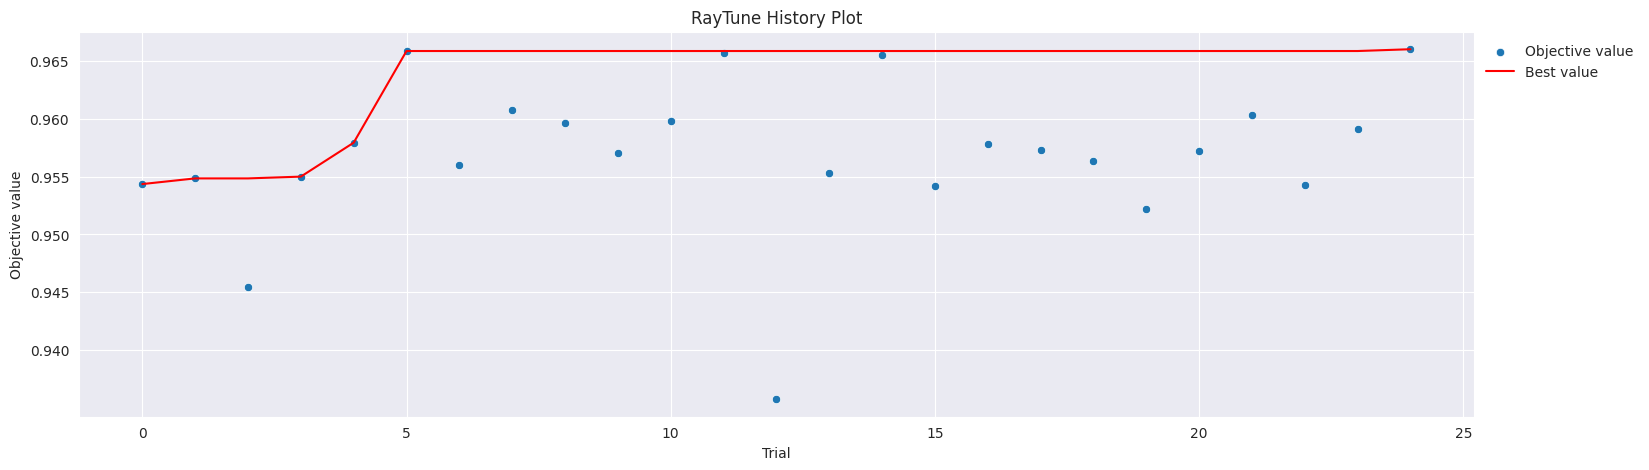

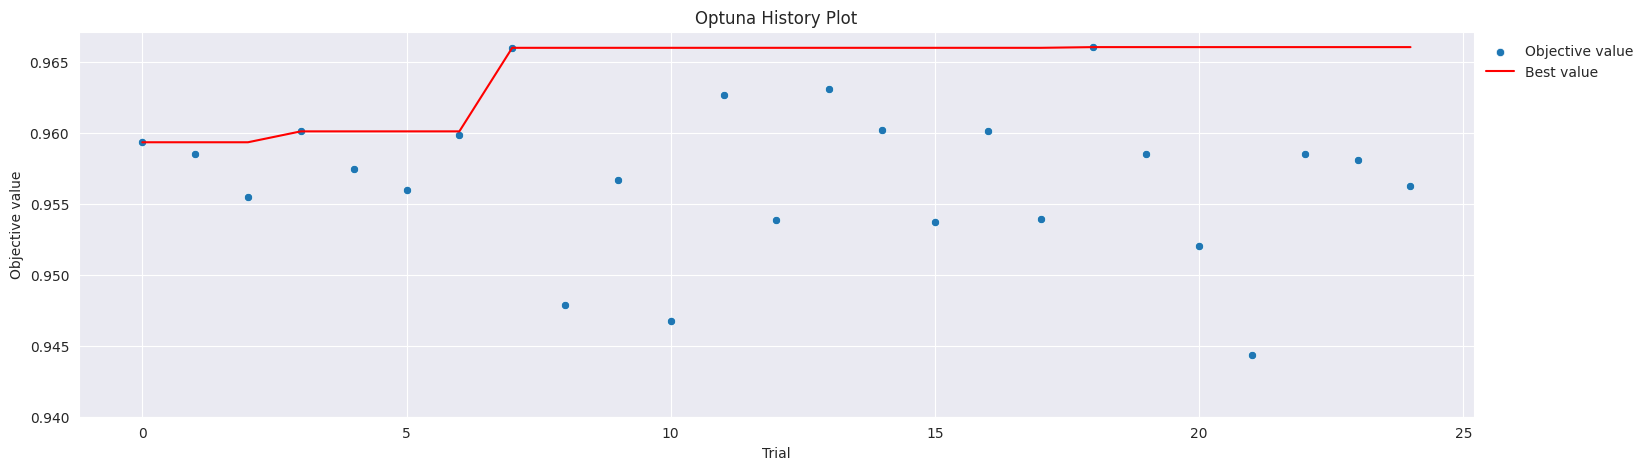

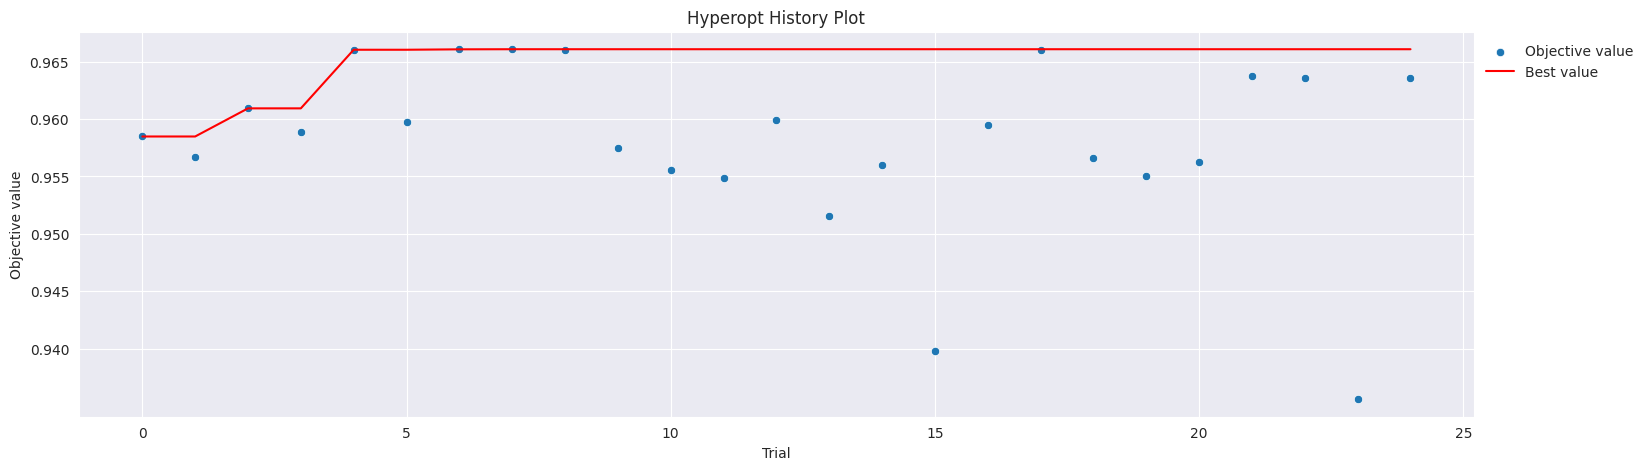

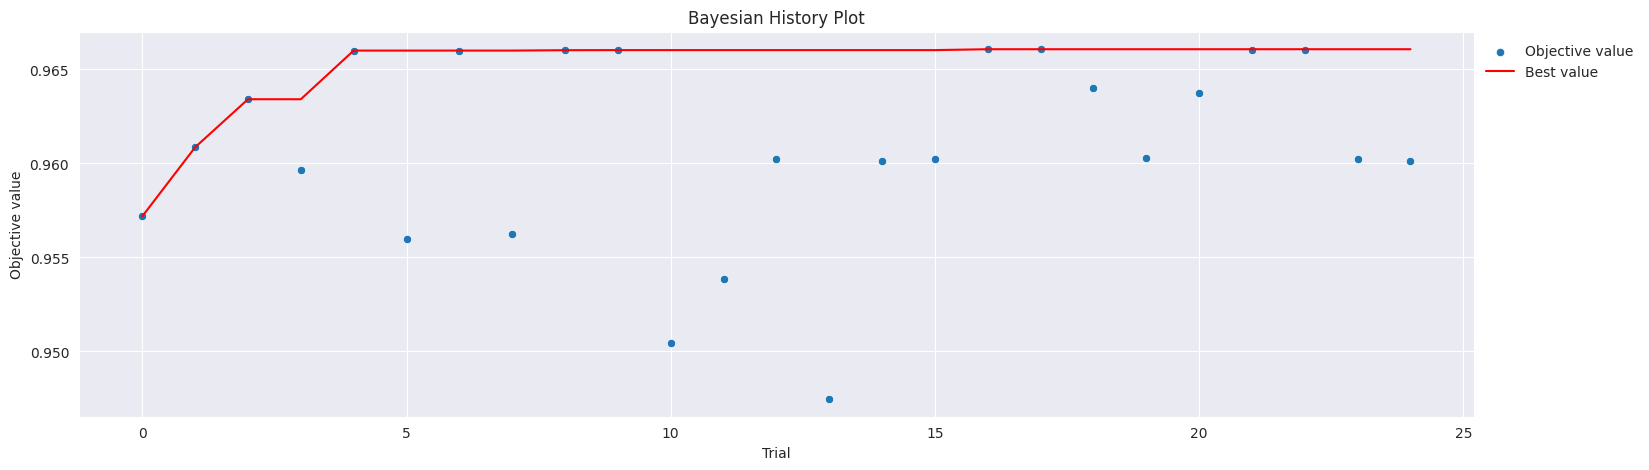

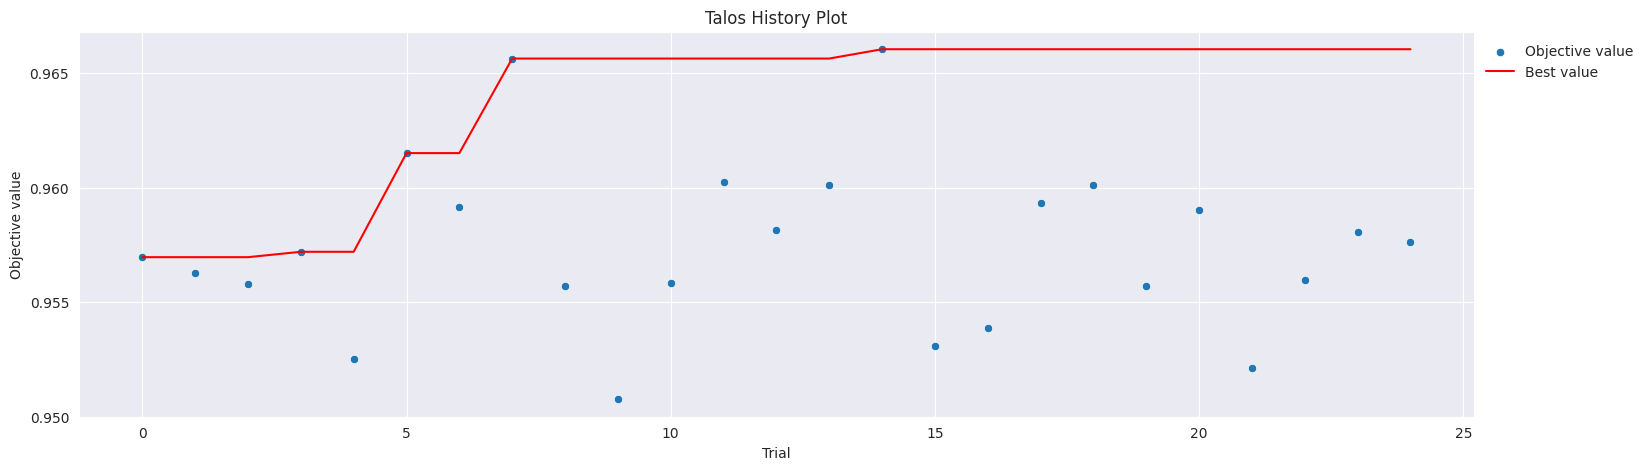

In [84]:
for name in frameworks:
    results = loaders[name].load_results()
    sorted = results["R2"].sort_values("Test", ascending=False)
    history_show(name, sorted.iloc[0].name)
    

## Сходимость

In [80]:
convergence_all = {}
convergence = {}
for name in frameworks:
    results = loaders[name].load_results()
    score_ids = []
    for idx, _ in results.iterrows():
        trials = loaders[name].load_trials(idx)
        score = trials["Value"].max()
        score_idx = trials["Value"].eq(score).idxmax()
        score_ids.append(score_idx)
    score_ids = np.array(score_ids)
    sorted = results["R2"].sort_values("Test", ascending=False)
    best_idx = sorted.iloc[0].name
    convergence[name] = {"Min": score_ids.min(),
                         "Max": score_ids.max(),
                         "Avg": round(score_ids.mean()),
                         "Best": score_ids[best_idx]}
    convergence_all[name] = score_ids
        

In [81]:
convergence = pd.DataFrame(convergence).transpose()
convergence

,Min,Max,Avg,Best
RayTune,5,24,15,24
Optuna,2,24,12,18
Hyperopt,1,24,15,7
Bayesian,16,24,19,16
Talos,3,24,16,14


In [82]:
convergence_all = pd.DataFrame(convergence_all).transpose()
convergence_all

,0,1,2,3,4,5,6,7,8,9
RayTune,22,24,5,11,22,24,11,11,10,11
Optuna,10,7,24,5,2,13,18,3,23,14
Hyperopt,24,1,21,7,4,24,22,24,23,4
Bayesian,24,18,16,19,18,17,23,23,18,16
Talos,24,15,16,20,13,14,23,3,17,18


# Params importances

In [18]:
optuna_results = loaders["Optuna"].load_results()
sorted_optuna = optuna_results["R2"].sort_values("Test", ascending=False)
optuna_best_idx = sorted_optuna.iloc[0].name

params = list(loaders["Optuna"].load_results()["Params"].columns)

In [22]:
fig = optuna.visualization.plot_param_importances(loaders["Optuna"].load_study(optuna_best_idx))
fig.update_layout(autosize=False, width=1000, height=500)

## All at one

In [23]:
fig = optuna.visualization.plot_contour(loaders["Optuna"].load_study(optuna_best_idx))
fig.update_layout(autosize=False, width=1500, height=1000)

## Every Pair

In [51]:
for first, second in itertools.combinations(params, 2):
    fig = optuna.visualization.plot_contour(loaders["Optuna"].load_study(optuna_best_idx),
                                            params=[first, second], target_name="R2 Score")
    fig.update_layout(autosize=False, width=1500, height=500)
    fig.show()